In [1]:
import sys
import importlib.util

src_dir = "/home/ubuntu/SML/SIGMAxPortal301-Team2/src"

sys.path.append(src_dir)

src_path = "/home/ubuntu/SML/SIGMAxPortal301-Team2/src/wrapper.py"
spec = importlib.util.spec_from_file_location("sigmaportal", src_path)
sigmaportal = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sigmaportal)

In [2]:
from problem2 import *

In [3]:
video_path = '/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/video/IMG_9860.mp4'
video = sigmaportal.read_video_to_tensor(video_path, frame_step=5, max_frame=1800)

In [4]:
print(f"Video shape: {video.shape}")

Video shape: torch.Size([173, 3, 1080, 1920])


3158 red Pixels,  433 Segments.


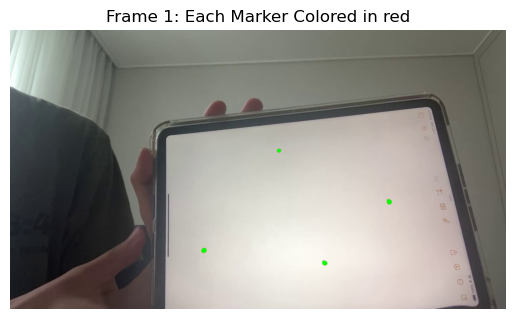

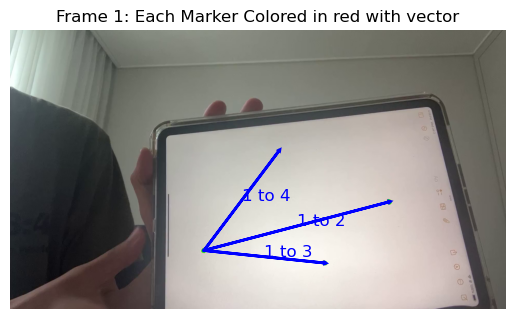

In [5]:
highlighted_pictures = []
marker_list = []

markers, highlighted_frame = heuristic_marker_highlight_for_first_frame(video[0], 
                                                                        black_threshold=0.5, 
                                                                        red_threshold=0.5, 
                                                                        gb_threshold=0.5,
                                                                        ratio_threshold=1.5,
                                                                        marker_size_threshold=40,
                                                                        number_of_markers=4, 
                                                                        picture=True)
highlighted_pictures.append(highlighted_frame)
marker_list.append(markers)
sigmaportal.show_picture(highlighted_frame, title='Frame 1: Each Marker Colored in red')
show_picture_with_marker_vector(highlighted_frame, markers, title='Frame 1: Each Marker Colored in red with vector')

In [6]:
for i in range(video.shape[0]-1):
    markers, highlighted_frame = marker_highlight(video[i], previous_marker=marker_list[-1], 
                                                  black_threshold=0.5, red_threshold=0.5, gb_threshold=0.5,
                                                  pixel_per_marker=20, picture=True)
    highlighted_pictures.append(highlighted_frame)
    marker_list.append(markers)

/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/SML/problem2.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  marker[key] = torch.mean(torch.tensor(segments[key]).to(dtype=torch.float32), dim=0)


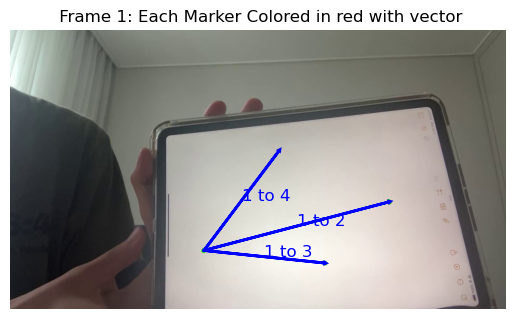

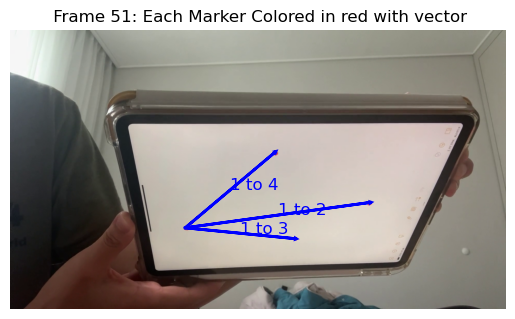

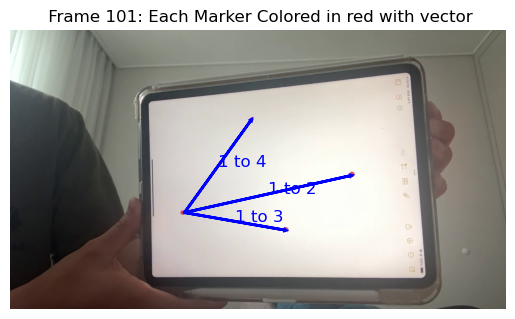

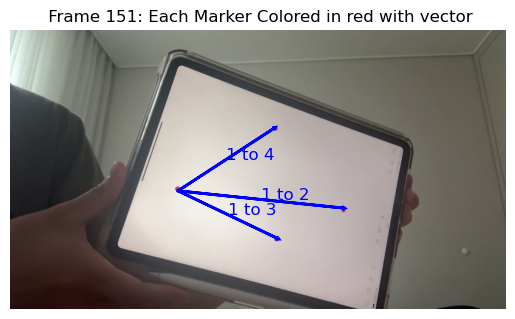

In [7]:
for i in range(0, len(highlighted_pictures), 50):
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')

In [8]:
vector_list = []
for marker in marker_list:
    origin = marker["Marker 1"]
    temp_vector_list = []
    for i in range(2, len(list(marker.keys()))+1):
        target = marker[f'Marker {i}']
        vector = target - origin
        vec0 = -vector[0].item()
        vector[0] = vector[1]
        vector[1] = vec0 # Rotate 90 degrees counter-clockwise
        temp_vector_list.append(vector)
    vector_list.append(torch.stack(temp_vector_list))

In [9]:
print(f"Vector list shape: {len(vector_list)} x {vector_list[0].shape}")
print()
for i in [0, 50, 100, 150]:
    print(f"Frame {i+1}: vector={vector_list[i]}")
    print()

Vector list shape: 173 x torch.Size([3, 2])

Frame 1: vector=tensor([[717.1780, 188.2062],
        [467.3584, -48.6710],
        [290.7411, 386.0598]])

Frame 51: vector=tensor([[715.4000,  98.2000],
        [426.0500, -42.0000],
        [347.8000, 292.8000]])

Frame 101: vector=tensor([[643.3500, 143.1000],
        [388.3500, -67.9000],
        [257.0500, 356.7000]])

Frame 151: vector=tensor([[ 641.2500,  -66.9500],
        [ 386.1000, -184.7000],
        [ 373.5500,  243.3500]])



In [10]:
theta_list = []
a_list = []
b_list = []
R_list = []
D_list = []
for i in range(1, len(vector_list)):
    theta, a, b, R, D = compute_projection_relation_assuming_perfect_2d_camera(vector_list[0], vector_list[i])
    theta_list.append(theta)
    a_list.append(a)
    b_list.append(b)
    R_list.append(R)
    D_list.append(D)

Frame 51: theta=-4.34, a=0.98, b=0.81, R=[[ 0.9971291   0.07572065]
 [-0.07572065  0.9971291 ]], D=[[0.9795692 0.       ]
 [0.        0.8139228]]


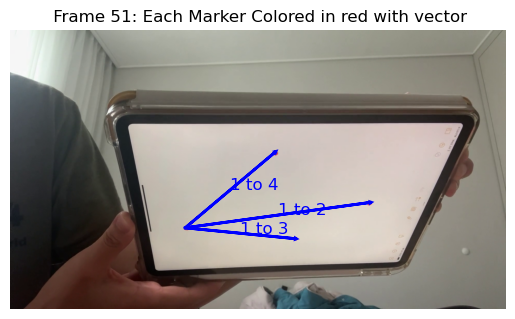

Frame 101: theta=-2.96, a=0.89, b=0.96, R=[[ 0.9986666   0.05162396]
 [-0.05162396  0.9986666 ]], D=[[0.8871066 0.       ]
 [0.        0.9618825]]


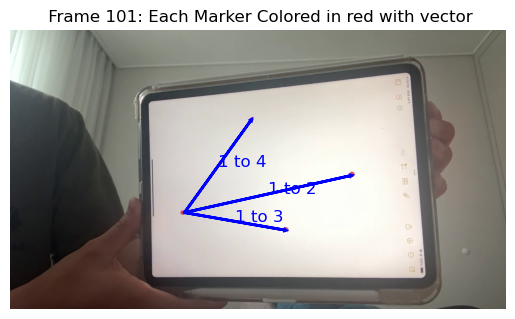

Frame 151: theta=-23.33, a=0.88, b=0.91, R=[[ 0.91821885  0.39607343]
 [-0.39607343  0.91821885]], D=[[0.8845447  0.        ]
 [0.         0.91272074]]


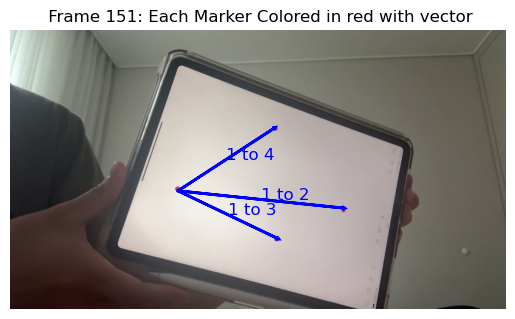

In [11]:
for i in [50, 100, 150]:
    print(f"Frame {i+1}: theta={theta_list[i]:.2f}, a={a_list[i]:.2f}, b={b_list[i]:.2f}, R={R_list[i].numpy()}, D={D_list[i].numpy()}")
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')

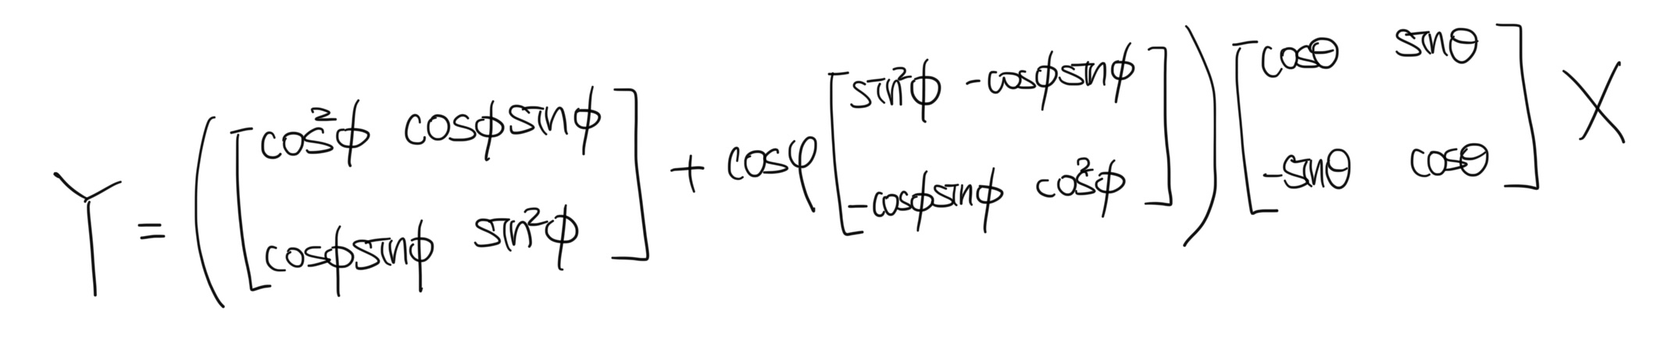

In [12]:
theta_list = []
phi_list = []
rho_list = []
R_list = []
T_list = []
for i in range(1, len(vector_list)):
    theta, phi, rho, R, T = fit_TR_analytic(vector_list[0], vector_list[i])
    theta_list.append(theta)
    phi_list.append(phi)
    rho_list.append(rho)
    R_list.append(R)
    T_list.append(T)

Frame 51: theta=-8.09, phi=16.86, rho=40.08, R=[[ 0.99005527  0.14067891]
 [-0.14067891  0.99005527]], T=[[0.98024804 0.06517728]
 [0.06517728 0.78492886]]


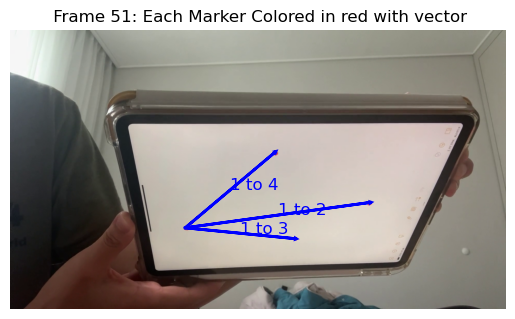

Frame 101: theta=-2.80, phi=90.46, rho=22.82, R=[[ 0.9988097  0.0487769]
 [-0.0487769  0.9988097]], T=[[ 9.21757230e-01 -6.24905596e-04]
 [-6.24905596e-04  9.99995009e-01]]


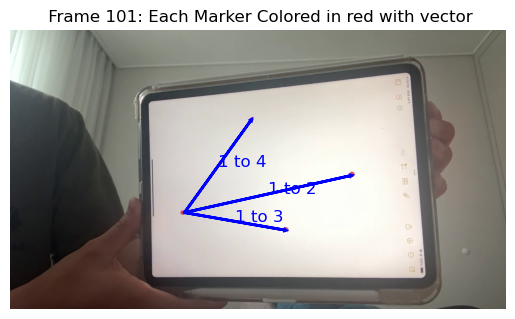

Frame 151: theta=-23.15, phi=75.69, rho=14.63, R=[[ 0.91945211  0.39320202]
 [-0.39320202  0.91945211]], T=[[0.96956963 0.00776134]
 [0.00776134 0.99802045]]


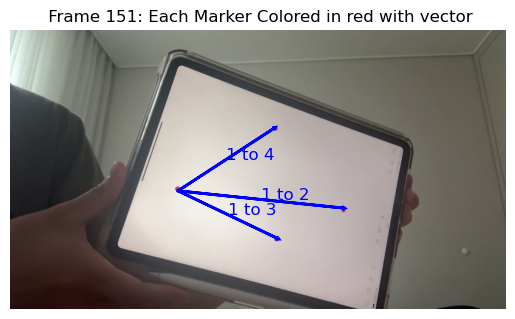

In [13]:
for i in [50, 100, 150]:
    print(f"Frame {i+1}: theta={theta_list[i]:.2f}, phi={phi_list[i]:.2f}, rho={rho_list[i]:.2f}, R={R_list[i]}, T={T_list[i]}")
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')